In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MFG 598/Final Project/dataset.csv')

In [ ]:
df.head()

,Text,Label
0,Budget to set scene for election\n \n Gordon B...,0
1,Army chiefs in regiments decision\n \n Militar...,0
2,Howard denies split over ID cards\n \n Michael...,0
3,Observers to monitor UK election\n \n Minister...,0
4,Kilroy names election seat target\n \n Ex-chat...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    2225 non-null   object
 1   Label   2225 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 34.9+ KB


In [ ]:
df.isnull().sum()

,0
Text,0
Label,0


In [ ]:
df.duplicated().sum()

98

In [ ]:
# we have to delete the repeated lines
df = df.drop_duplicates()
df.shape

(2127, 2)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Label
0    403
1    505
2    347
3    369
4    503
Name: count, dtype: int64


<ipython-input-9-2baeba6443c5>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])


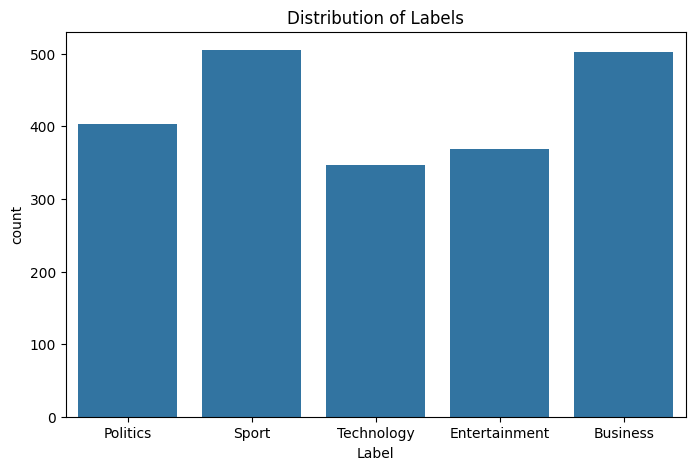

In [ ]:
print(df.Label.value_counts().sort_index())
fig, ax=plt.subplots(figsize=(8,5))
sns.barplot(x=df.Label.value_counts().index, y=df.Label.value_counts(), ax=ax)
ax.set_title("Distribution of Labels")
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
plt.show()

In [ ]:
import re
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def clean_text(text):
    text = re.sub('\n', " ", text)
    text = re.sub(r'[^a-zA-Z]', " ", text)
    text = re.sub(r'\s+', " ", text)
    text = text.lower()
    text = text.split()
    text = [j for j in text if len(text) > 1]
    text = [i for i in text if not i in set(stopwords.words("english"))]
    text = " ".join(text)
    return text

df["cleaned_text"] = df["Text"].apply(clean_text)

In [ ]:
df.head()

,Text,Label,cleaned_text
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...


In [ ]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df.head()

,Text,Label,cleaned_text,word_count,text_length
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833


In [ ]:
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%    75%     max   
Label                                                                         
0          403.0  254.679901  154.416424  48.0  182.0  251.0  297.5  2203.0   
1          505.0  182.978218  104.324649  62.0  114.0  154.0  224.0   930.0   
2          347.0  292.066282  129.308426  96.0  206.5  268.0  357.0  1466.0   
3          369.0  192.376694  138.266565  83.0  132.0  157.0  208.0  1777.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.0   510.0   

      text_length                                                           \
            count         mean          std    min     25%     50%     75%   
Label                                                                        
0           403.0  1837.148883  1107.768077  340.0  1311.5  1801.0  2155.5   
1           505.0  1259.530693   714.180746  439.0   787.0  1079.0  1523.0   
2           347.0  2079.564841   910.098390  648.0  1456.5  1890.0  2589.5   
3           369.0  1329.907859   942.519892  550.0   903.0  1082.0  1447.0   
4           503.0  1391.568588   569.946327  537.0   983.5  1278.0  1661.0   

                
           max  
Label           
0      16135.0  
1       6365.0  
2      10047.0  
3      11878.0  
4       3720.0

In [ ]:
df = df.loc[df['word_count'] >= 75]
df = df.loc[df['word_count'] <= 760]
df.groupby('Label').describe()

word_count                                                             \
           count        mean         std   min    25%    50%     75%    max   
Label                                                                         
0          399.0  244.208020   81.986390  83.0  182.0  251.0  297.00  543.0   
1          491.0  182.955193   94.647887  75.0  117.0  156.0  226.50  630.0   
2          345.0  287.092754  109.238977  96.0  206.0  268.0  357.00  686.0   
3          366.0  182.486339   81.321574  83.0  132.0  156.0  207.75  677.0   
4          503.0  193.272366   77.771625  75.0  137.0  178.0  228.00  510.0   

      text_length                                                          \
            count         mean         std    min     25%     50%     75%   
Label                                                                       
0           399.0  1762.716792  590.103600  560.0  1311.5  1799.0  2149.0   
1           491.0  1259.476578  650.787379  485.0   807.5  1083.0  1536.5   
2           345.0  2045.672464  779.141918  648.0  1456.0  1889.0  2573.0   
3           366.0  1263.292350  568.322409  550.0   901.5  1079.5  1428.5   
4           503.0  1391.568588  569.946327  537.0   983.5  1278.0  1661.0   

               
          max  
Label          
0      3968.0  
1      4336.0  
2      4933.0  
3      4926.0  
4      3720.0

In [ ]:
df["word_count"] = df["cleaned_text"].apply(lambda x: len(x.split()))

df["text_length"] = df["cleaned_text"].apply(lambda x: len(str(x)))

df["stopwords_count"] = df["Text"].apply(lambda x: len([i for i in x.split() if i in set(stopwords.words("english"))]))

df["punct_count"] = df["Text"].apply(lambda x: len([i for i in x if i in string.punctuation]))

df["caps_count"] = df["Text"].apply(lambda x: len([i for i in str(x) if i.isupper()]))

df.head()

,Text,Label,cleaned_text,word_count,text_length,stopwords_count,punct_count,caps_count
0,Budget to set scene for election\n \n Gordon B...,0,budget set scene election gordon brown seek pu...,308,2163,200,71,85
1,Army chiefs in regiments decision\n \n Militar...,0,army chiefs regiments decision military chiefs...,273,2078,204,54,85
2,Howard denies split over ID cards\n \n Michael...,0,howard denies split id cards michael howard de...,316,2178,201,81,99
3,Observers to monitor UK election\n \n Minister...,0,observers monitor uk election ministers invite...,291,2237,176,67,81
4,Kilroy names election seat target\n \n Ex-chat...,0,kilroy names election seat target ex chat show...,269,1833,163,88,138


In [ ]:
grouped_text = df.groupby("Label").agg({"word_count": "mean",
                                        "text_length": "mean",
                                        "stopwords_count": "mean",
                                        "punct_count": "mean",
                                        "caps_count": "mean"})
grouped_text = grouped_text.reset_index(drop=True)
grouped_text

,word_count,text_length,stopwords_count,punct_count,caps_count
0,244.208020,1762.716792,168.837093,65.152882,78.100251
1,182.955193,1259.476578,127.323829,60.038697,74.346232
2,287.092754,2045.672464,194.162319,73.171014,81.527536
3,182.486339,1263.292350,110.333333,53.352459,78.461749
4,193.272366,1391.568588,117.924453,56.699801,61.242545


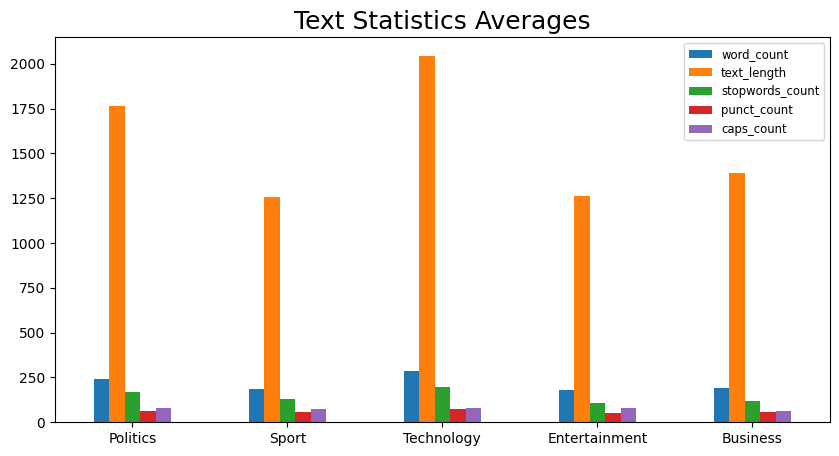

In [ ]:
fig, ax=plt.subplots(figsize=(10,5))
grouped_text.plot(kind="bar", ax=ax)
ax.set_xticklabels(["Politics", "Sport", "Technology", "Entertainment", "Business"])
ax.set_title("Text Statistics Averages", fontsize=18)
ax.legend(fontsize="small")
plt.xticks(rotation=0)
plt.show()

In [ ]:
from wordcloud import WordCloud, STOPWORDS

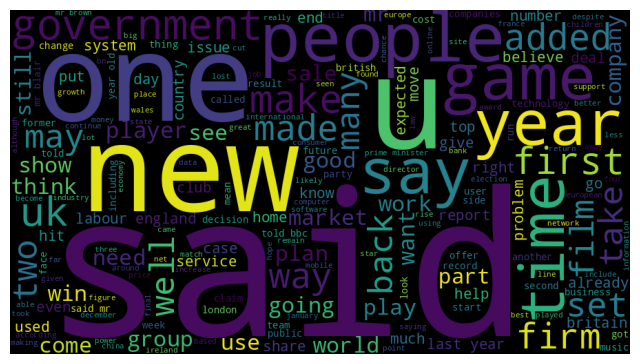

In [ ]:
all_cleaned_text = " ".join(df["cleaned_text"])
word_cld = WordCloud(width=900, height=500).generate(all_cleaned_text)
plt.figure(figsize=(8,6))
plt.imshow(word_cld)
plt.axis("off")
plt.show()

In [ ]:
#Import all the dependencies
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
data = df['cleaned_text']

tagged_data = [TaggedDocument(words=word_tokenize(_d.lower()), tags=[str(i)]) for i, _d in enumerate(data)]

In [ ]:
model = Doc2Vec(vector_size=384,
                min_count=4, epochs=50)
model.build_vocab(tagged_data)
model.train(tagged_data,
            total_examples=model.corpus_count,
            epochs=model.epochs)

In [ ]:
document_vectors = [model.infer_vector(
    word_tokenize(doc.lower())) for doc in data]


In [ ]:
import pickle
pickle.dump(model, open('doc2vec_model.pkl', 'wb'))
pickle.dump(document_vectors, open('document_vectors.pkl', 'wb'))

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logreg.predict(X_test)
print("y_pred \n", y_pred)
print(classification_report(y_test, y_pred))

# Calculate the accuracy of the model
accuracy = logreg.score(X_test, y_test)

print("Accuracy:", accuracy)

y_pred 
 [2 0 3 0 0 0 4 4 3 4 3 1 4 4 4 2 1 2 4 2 3 2 2 1 2 0 1 4 1 4 1 3 4 3 4 3 1
 0 2 0 0 4 0 3 4 4 4 1 4 0 3 1 4 4 0 0 0 2 1 3 1 1 3 4 1 4 2 1 4 3 0 0 1 1
 1 1 1 4 3 3 1 2 1 2 2 2 3 3 2 2 2 2 4 3 1 0 1 3 4 0 4 4 1 0 4 0 0 4 4 4 4
 0 0 3 2 4 4 3 3 2 3 4 0 1 1 2 1 4 4 2 1 2 4 2 1 4 2 3 0 4 1 3 0 0 0 1 4 4
 4 0 0 3 4 4 0 4 1 1 0 4 4 3 3 0 0 0 2 3 2 1 1 3 0 1 2 0 4 1 2 4 0 1 0 3 1
 0 3 2 0 1 1 1 3 4 1 4 0 1 4 4 0 2 3 1 3 3 4 1 1 4 4 0 4 3 1 1 2 0 1 4 4 0
 0 2 4 2 3 4 1 3 1 0 1 3 3 2 0 1 1 0 1 4 4 3 4 2 1 2 3 2 3 4 4 1 4 1 2 2 0
 0 1 1 1 2 4 3 2 0 1 3 0 4 3 3 0 4 1 3 4 4 3 3 4 1 2 3 1 1 3 1 1 2 4 1 2 2
 4 2 1 1 2 4 2 0 3 3 0 3 2 4 3 4 3 1 1 4 2 4 3 4 1 0 3 0 0 0 1 4 2 3 3 1 2
 0 1 4 4 1 4 1 4 2 3 2 2 4 0 4 4 1 4 0 4 4 4 1 1 1 4 3 2 4 1 2 4 0 3 4 4 0
 1 0 3 0 0 2 0 1 3 4 4 0 1 1 2 3 4 0 4 1 4 0 1 2 1 3 3 0 4 4 0 2 0 1 2 4 0
 1 1 1 0 3 0 1 3 4 4 3 2 1 4]
              precision    recall  f1-score   support

           0       0.95      0.91      0.93        81
           1       0.97    

In [ ]:
import pickle

In [ ]:
pickle.dump(logreg, open('model.pkl', 'wb'))

In [ ]:
pickled_model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
pickled_model.predict(X_test)

array([2, 0, 3, 0, 0, 0, 4, 4, 3, 4, 3, 1, 4, 4, 4, 2, 1, 2, 4, 2, 3, 2,
       2, 1, 2, 0, 1, 4, 1, 4, 1, 3, 4, 3, 4, 3, 1, 0, 2, 0, 0, 4, 0, 3,
       4, 4, 4, 1, 4, 0, 3, 1, 4, 4, 0, 0, 0, 2, 1, 3, 1, 1, 3, 4, 1, 4,
       2, 1, 4, 3, 0, 0, 1, 1, 1, 1, 1, 4, 3, 3, 1, 2, 1, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 4, 3, 1, 0, 1, 3, 4, 0, 4, 4, 1, 0, 4, 0, 0, 4, 4, 4,
       4, 0, 0, 3, 2, 4, 4, 3, 3, 2, 3, 4, 0, 1, 1, 2, 1, 4, 4, 2, 1, 2,
       4, 2, 1, 4, 2, 3, 0, 4, 1, 3, 0, 0, 0, 1, 4, 4, 4, 0, 0, 3, 4, 4,
       0, 4, 1, 1, 0, 4, 4, 3, 3, 0, 0, 0, 2, 3, 2, 1, 1, 3, 0, 1, 2, 0,
       4, 1, 2, 4, 0, 1, 0, 3, 1, 0, 3, 2, 0, 1, 1, 1, 3, 4, 1, 4, 0, 1,
       4, 4, 0, 2, 3, 1, 3, 3, 4, 1, 1, 4, 4, 0, 4, 3, 1, 1, 2, 0, 1, 4,
       4, 0, 0, 2, 4, 2, 3, 4, 1, 3, 1, 0, 1, 3, 3, 2, 0, 1, 1, 0, 1, 4,
       4, 3, 4, 2, 1, 2, 3, 2, 3, 4, 4, 1, 4, 1, 2, 2, 0, 0, 1, 1, 1, 2,
       4, 3, 2, 0, 1, 3, 0, 4, 3, 3, 0, 4, 1, 3, 4, 4, 3, 3, 4, 1, 2, 3,
       1, 1, 3, 1, 1, 2, 4, 1, 2, 2, 4, 2, 1, 1, 2,